In [2]:
import torch
import random
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
size = 128

In [5]:
class CatNet(nn.Module):
    def __init__(self, inputsize, outputsize):
        super().__init__()
        self.inputsize = inputsize
        self.outputsize = outputsize
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(32, 64, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 128, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(128, 256, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(256, 1024, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(1024, 2048, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Flatten(),
            torch.nn.Linear(32768, outputsize*4),
            torch.nn.Dropout(),
            torch.nn.Linear(outputsize*4, outputsize)
        ) 
    def forward(self, x):
        return self.model(x)


In [6]:
train_dataset = torch.load("datasets/train.pt")
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=False)
train_dataset = torch.load("datasets/train.pt")
train_dataloader_1 = torch.utils.data.DataLoader(train_dataset)
test_dataset = torch.load("datasets/test.pt")
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)
test_dataset = torch.load("datasets/test.pt")
test_dataloader_1 = torch.utils.data.DataLoader(test_dataset)
result_dataset = torch.load("datasets/predict.pt")
result_dataloader_1 = torch.utils.data.DataLoader(result_dataset)

In [7]:
num_epochs = 10
learning_rate = 0.01
weight_decay = 0.1
model = CatNet(16, 18)
criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay) 
loss_history = []

In [214]:
for i in range(num_epochs):
    for x_batch, y_batch in train_dataloader:
        predictions = model.forward(x_batch)

        loss = criterion(predictions, y_batch)

        # Backward
        loss.backward()

        # Update weights
        optimizer.step()
        optimizer.zero_grad() 

        loss_history.append(loss.item())
    print(f'{i+1}/{num_epochs} current loss: {loss}')   

1/10 current loss: 16.946887969970703
2/10 current loss: 22.200071334838867
3/10 current loss: 17.013288497924805
4/10 current loss: 17.530672073364258
5/10 current loss: 17.58557891845703
6/10 current loss: 15.500211715698242
7/10 current loss: 17.56867027282715
8/10 current loss: 20.98347282409668
9/10 current loss: 18.629987716674805
10/10 current loss: 16.097686767578125


In [224]:
torch.save(model.state_dict, 'weights/CatNet.pth')

In [9]:
model = CatNet(16, 18)
model.load_state_dict(torch.load('weights/CatNet.pth')())
model.eval()

CatNet(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil

In [7]:
from sklearn.metrics import mean_absolute_error
real = []
pred = []
for x, y in train_dataloader_1:
    preds = model.forward(x)
    real.append(y[0].tolist())
    pred.append(preds[0].tolist())
print(f"MAE on train data : {mean_absolute_error(real, pred)}")
real = []
pred = []
for x, y in test_dataloader_1:
    preds = model.forward(x)
    real.append(y[0].tolist())
    pred.append(preds[0].tolist())
print(f"MAE on test data : {mean_absolute_error(real, pred)}")

KeyboardInterrupt: 

C:\Users\Oleg\AppData\Local\Temp\ipykernel_12584\1514885454.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axs[num, i].plot(x,y, 'ro', color = 'blue')
C:\Users\Oleg\AppData\Local\Temp\ipykernel_12584\1514885454.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axs[num, i].plot(x,y, 'ro', color = 'blue')
C:\Users\Oleg\AppData\Local\Temp\ipykernel_12584\1514885454.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axs[num, i].plot(x,y, 'ro', color = 'blue')


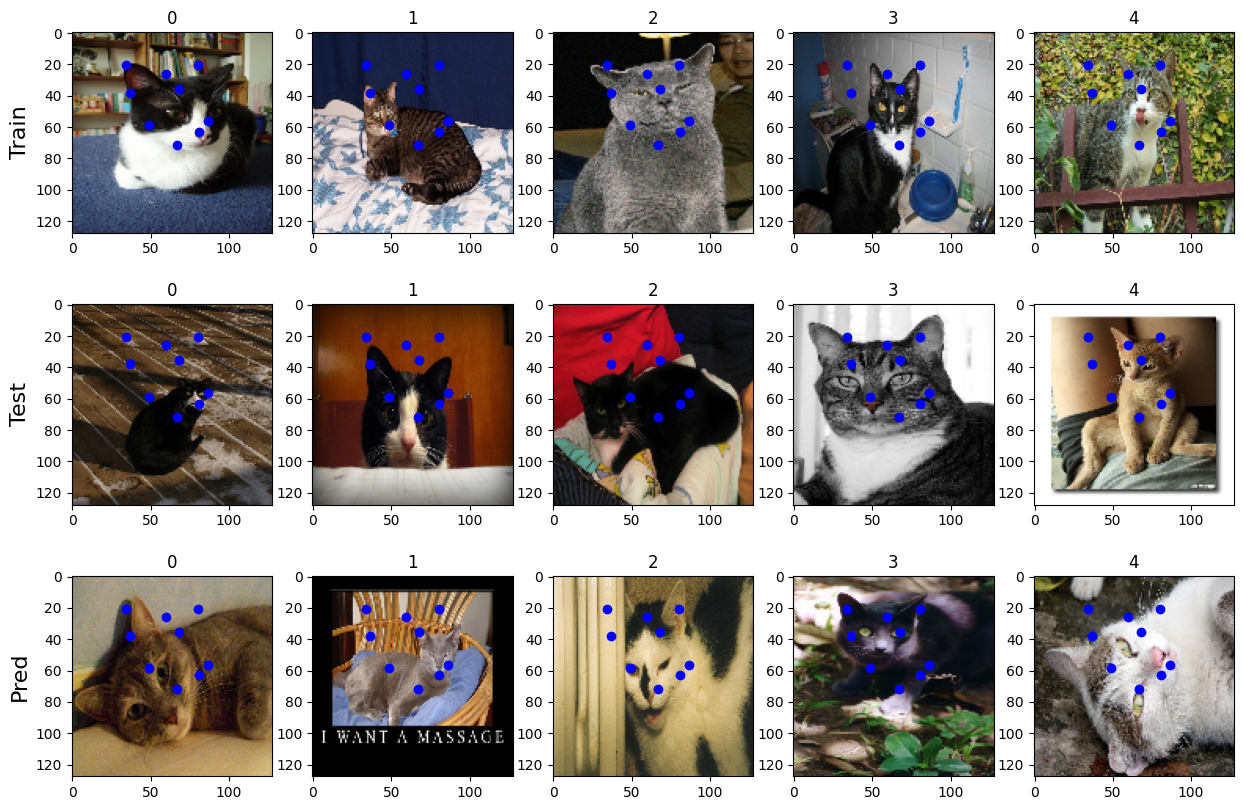

In [8]:
fig, axs = plt.subplots(nrows= 3 , ncols= 5,  figsize=(15,10))
cats_nums = range(5)
num = 0
axs[num,0].set_ylabel('Train', fontsize=16)
for i in cats_nums:
    x, y = train_dataset[i]
    axs[num, i].set_title(str(i))
    draw_img = x.type('torch.IntTensor')
    draw_points = model.forward(torch.stack([x]))[0].detach().numpy()
    axs[num, i].imshow(draw_img.permute(1,2,0))
    for j in range(0, len(draw_points),2):
                x, y = draw_points[j], draw_points[j+1] 
                axs[num, i].plot(x,y, 'ro', color = 'blue')
num = 1
axs[num,0].set_ylabel('Test', fontsize=16)
for i in cats_nums:
    x, y = test_dataset[i]
    axs[num, i].set_title(str(i))
    draw_img = x.type('torch.IntTensor')
    draw_points = model.forward(torch.stack([x]))[0].detach().numpy()
    axs[num, i].imshow(draw_img.permute(1,2,0))
    for j in range(0, len(draw_points),2):
                x, y = draw_points[j], draw_points[j+1] 
                axs[num, i].plot(x,y, 'ro', color = 'blue')
num = 2
axs[num,0].set_ylabel('Pred', fontsize=16)
for i in cats_nums:
    x = result_dataset[i][0]
    axs[num, i].set_title(str(i))
    draw_img = x.type('torch.IntTensor')
    draw_points = model.forward(torch.stack([x]))[0].detach().numpy()
    axs[num, i].imshow(draw_img.permute(1,2,0))
    for j in range(0, len(draw_points),2):
                x, y = draw_points[j], draw_points[j+1] 
                axs[num, i].plot(x,y, 'ro', color = 'blue')

In [22]:
import torch 
import pandas as pd
from PIL import Image 
from os import listdir
from os.path import isfile, join
import torchvision.transforms as transforms 
import pandas as pd
import matplotlib.pyplot as plt
import math

size1 = 128
size2 = 128
train_split_size = 0.3

def get_img_by_name(name):
    transform_with_size = transforms.Compose([ 
        transforms.PILToTensor(),
        transforms.Resize((size1, size2)) 
    ]) 
    transform_without_size = transforms.Compose([ 
        transforms.PILToTensor()
    ]) 
    for path in ['images/images/train/', 'images/images/test/']:
        if name in listdir(path):
            filename = join(path, name)
            if isfile(filename):
                image = Image.open(filename)
                width, height = image.size
                img_tensor_with_size = transform_with_size(image).type('torch.FloatTensor')
                img_tensor_without_size = transform_without_size(image).type('torch.FloatTensor')
                return img_tensor_with_size, img_tensor_without_size, width, height
            
def draw_img_by_name(name, model, axis, tittle = True):
    img_tensor_with_size, img_tensor_without_size, width, height = get_img_by_name(name)
    csv = pd.read_csv('train_labels.csv')
    x = img_tensor_with_size
    axis.set_title(name)
    draw_img = x.type('torch.IntTensor')
    draw_points = model.forward(torch.stack([x]))[0].detach().numpy()
    axis.imshow(draw_img.permute(1,2,0))
    for j in range(0, len(draw_points),2):
                x, y = draw_points[j], draw_points[j+1] 
                axis.plot(x,y, 'r*', color = 'blue')
                
    arr = csv.loc[csv['file_name'] == name].drop('file_name', axis = 1).values[0]
    if len(arr) > 0:
         for j in range(0, len(arr),2):
                x, y = arr[j]*(size/width), arr[j+1]*(size/height) 
                axis.plot(x,y, 'g*', color = 'green')



c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
C:\Users\Oleg\AppData\Local\Temp\ipykernel_15848\3384076063.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  axis.plot(x,y, 'r*', color 

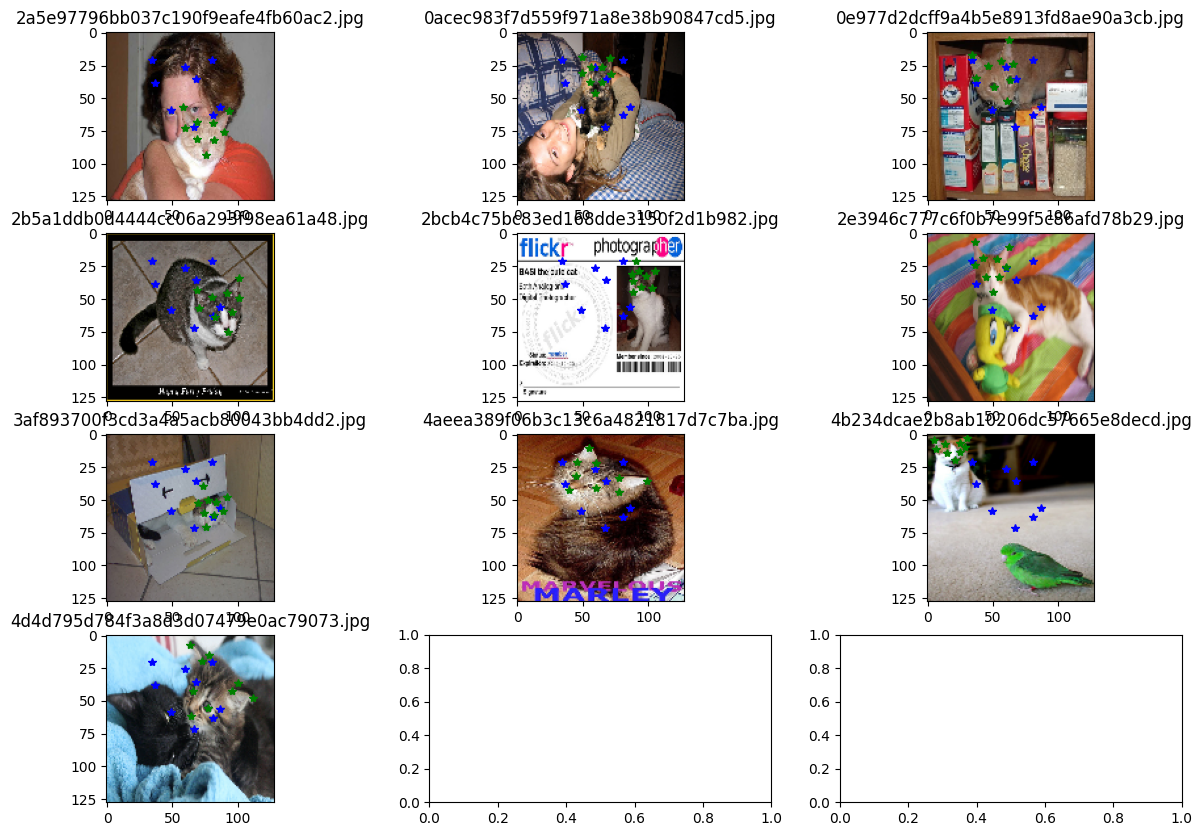

In [23]:
#from pythonUtils.drawing import draw_img_by_name
intresting_pictures = ['2a5e97796bb037c190f9eafe4fb60ac2.jpg', '0acec983f7d559f971a8e38b90847cd5.jpg', '0e977d2dcff9a4b5e8913fd8ae90a3cb.jpg', '2b5a1ddb0d4444cc06a293f98ea61a48.jpg', '2bcb4c75bc83ed168dde3150f2d1b982.jpg', '2e3946c777c6f0b7e99f5c86afd78b29.jpg', '3af893700f3cd3a4a5acb80043bb4dd2.jpg', '4aeea389f06b3c13c6a4821817d7c7ba.jpg', '4b234dcae2b8ab10206dc57665e8decd.jpg', '4d4d795d784f3a8d3d07479e0ac79073.jpg']
fig, axs = plt.subplots(nrows= (len(intresting_pictures)//3)+1, ncols= 3,  figsize=(15,10))

for i in range(len(intresting_pictures)):
    draw_img_by_name(intresting_pictures[i], model, axs[i//3,i%3])

In [217]:
pred = []
for x in result_dataloader_1:
    preds = model.forward(x[0])
    pred.append(preds[0].tolist())
predSizesNames = pd.read_csv('datasets/predictSizez&names.csv')

In [218]:
columns = pd.read_csv('train_labels.csv').columns
result = pd.DataFrame(columns=columns)

In [219]:
for row in range(len(pred)):
    width = predSizesNames.loc[row,'0']
    height = predSizesNames.loc[row,'0']
    for i in range(0, len(pred[row]),2):
            pred[row][i] = pred[row][i]*(width/size)
            pred[row][i+1] = pred[row][i+1]*(height/size)

In [220]:
for row in range(len(pred)):
    result.loc[-1] = pred[row]+[predSizesNames.loc[row,'2']]
    result.index = result.index + 1
    result = result.sort_index()

In [221]:
result = result.rename(columns={"file_name":"file_names"})

In [222]:
result.to_csv('results/result.csv',index=False)